In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image as im
import random
%autosave 190

Autosaving every 190 seconds


In [2]:
#all library needed for CNN
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout, BatchNormalization, Input, MaxPooling2D, GlobalAveragePooling2D
from tensorflow.keras import optimizers,regularizers
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.applications import VGG19, DenseNet201, DenseNet121
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split, GroupShuffleSplit

import os
import cv2

In [3]:
dir_dataset = r'C:\CSU class\Calss 2022 Spring Local\DSCI 478\Final Project\Datasets'

In [4]:
expic = os.path.join(dir_dataset, 'Train')
expic = os.path.join(expic, 'images')
expic = os.path.join(expic, 'Ascaris_434_jpg.rf.3a16754f3edda0934d87e94eadec4c92.jpg')

In [5]:
# expic = os.path.join(dir_dataset, 'Ascaris_434_jpg.rf.3a16754f3edda0934d87e94eadec4c92.jpg')
img = im.open(expic)
# img.show()

In [6]:
print(img.mode)

RGB


In [7]:
np.array(img.resize((150, 150))).shape

(150, 150, 3)

In [8]:
np.array(img).shape

(4000, 3000, 3)

Getting training dataset from files

In [9]:
path = os.path.join(dir_dataset, "Train")
path = os.path.join(path, "images")
dir_list = os.listdir(path)
dir_list

['Ascaris-lumbricoides_1009_jpg.rf.149f06691df0df97e94f544988824f81.jpg',
 'Ascaris-lumbricoides_1010_jpg.rf.5f7b2e5c9cd6b8ee5c8ecc97e010ef97.jpg',
 'Ascaris-lumbricoides_1057_jpg.rf.9205da8bb956601a0780c2252f9cc2d5.jpg',
 'Ascaris-lumbricoides_1058_jpg.rf.b7909e552a586c08c96febc3a20864cf.jpg',
 'Ascaris-lumbricoides_1059_jpg.rf.4cd574e29a9db4fef2f403c629b271d1.jpg',
 'Ascaris-lumbricoides_1068_jpg.rf.d7ddb2613189c1ff959bf8e169c94714.jpg',
 'Ascaris-lumbricoides_1069_jpg.rf.8e0c46f32ed972f11426df9a6f687fb9.jpg',
 'Ascaris-lumbricoides_1075_jpg.rf.0e4680b00b42abceac4c0621997f120b.jpg',
 'Ascaris-lumbricoides_1076_jpg.rf.d27cea5110cbcdeeb1d026785060c5bc.jpg',
 'Ascaris-lumbricoides_1077_jpg.rf.6414cff9475ae9fe567f63accb8a09af.jpg',
 'Ascaris-lumbricoides_1086_jpg.rf.fc88c933714b3e15d99afea0754e208b.jpg',
 'Ascaris-lumbricoides_1087_jpg.rf.28dfa95dc0ecb38cadf1c49508d03dfe.jpg',
 'Ascaris-lumbricoides_1088_jpg.rf.1336cf64ad2aecf2860dcecfc046a885.jpg',
 'Ascaris-lumbricoides_1119_jpg.rf.94a

In [10]:
a = dir_list[0]
a.split('-')

['Ascaris', 'lumbricoides_1009_jpg.rf.149f06691df0df97e94f544988824f81.jpg']

In [11]:
path

'C:\\CSU class\\Calss 2022 Spring Local\\DSCI 478\\Final Project\\Datasets\\Train\\images'

In [12]:
labels = list()
train = list()
for i in range(len(dir_list)):
    if '-' in dir_list[i]:
        temp1 = dir_list[i].split('-')[0]
        labels.append(temp1)
    else:
        temp1 = dir_list[i].split('_')[0]
        labels.append(temp1)
    
    imgPath = os.path.join(path, dir_list[i])
    img = im.open(imgPath)
    img = img.resize((150,150))
    temp2 = np.array(img)
    train.append(temp2)
    if (i % 100 == 0) or i == (len(dir_list) - 1):
        print(i)

0
100
200
300
400
500
600
700
800
855


In [13]:
np.unique(labels)
dic = dict()
for name in labels:
    if not name in dic:
        dic[name] = 1
    else:
        dic[name] += 1

In [14]:
pd.Series(dic)

Ascaris         151
Echinostoma      33
Echino           82
Hookworm         19
hookworms        60
MIF              78
Opisthorchis     12
OV               91
Taenia          226
Trichuris       104
dtype: int64

In [15]:
# ax = pd.Series(dic).plot.hist(bins = 12, alpha = 0.5)

In [16]:
np.array(train).shape, np.array(labels).shape

((856, 150, 150, 3), (856,))

In [17]:
correct_labels = list()
for i in range(len(labels)):
    if labels[i].lower() == 'hookworms':
        correct_labels.append("Hookworm")
    elif labels[i].lower() == 'echino':
        correct_labels.append("Echinostoma")
    elif labels[i].lower() == 'opisthorchis':
        correct_labels.append('OV')
    else:
        correct_labels.append(labels[i])
np.unique(np.array(correct_labels))

array(['Ascaris', 'Echinostoma', 'Hookworm', 'MIF', 'OV', 'Taenia',
       'Trichuris'], dtype='<U11')

In [18]:
list(np.unique(labels)).index('Ascaris')

0

In [19]:
labelsnum = list()
classify = np.unique(correct_labels)
for i in range(len(correct_labels)):
    temp1 = [list(classify).index(correct_labels[i])]
    labelsnum.append(temp1)

In [20]:
xtrain, xtest, ytrain, ytest = train_test_split(
    np.array(train), np.array(labelsnum), test_size=.1 , random_state=1)

In [21]:
xtrain.shape, xtest.shape, ytrain.shape, ytest.shape

((770, 150, 150, 3), (86, 150, 150, 3), (770, 1), (86, 1))

convert y to a categorical label

In [22]:
xtrain = xtrain/255.0
xtest = xtest/255.0
ytrain = to_categorical(ytrain)
ytest = to_categorical(ytest)

In [23]:
ytrain.shape, ytest.shape

((770, 7), (86, 7))

#### Add weight

In [24]:
# Find the percentage of each class
#the class weight equation is n_samples / (n_classes * np.bincout(y) 
from collections import Counter
classcount = Counter(correct_labels)
totalamount = sum([i for i in classcount.values()])
# classpercentage = {key: np.around(val/totalamount, 4) for key, val in classcount.items()}
classweight = {key: np.around(totalamount / (len(classcount) * val), 4) for key, val in classcount.items()}
tagname = {0: 'Ascaris', 1:'Echinostoma', 2: 'Hookworm', 3:'MIF',
          4:"OV", 5:'Taenia',  6 : "Trichuris"}
classweight

{'Ascaris': 0.8098,
 'Echinostoma': 1.0634,
 'Hookworm': 1.5479,
 'MIF': 1.5678,
 'OV': 1.1872,
 'Taenia': 0.5411,
 'Trichuris': 1.1758}

In [25]:
#We our y lavel will get transform to categorical list :like [0, 0, 1, 0, 0, 0, 0]
#so we need a function that could tell use that weight is it from y label
def defind_weight(lis):
    index = np.argmax(lis)
    name = tagname[index]
    weight = classweight[name] 
    return weight, name

class_weight_var = dict(zip(tagname.keys(), classweight.values()))
class_weight_var
#Done! hhahhaha

{0: 0.8098, 1: 1.0634, 2: 1.5479, 3: 1.5678, 4: 1.1872, 5: 0.5411, 6: 1.1758}

Start trainng model

In [26]:
data_train = ImageDataGenerator(
#     rotation_range = 8,
#     zoom_range=0.1
)
train_gen = data_train.flow(xtrain, ytrain, batch_size = 16, shuffle = True)

In [27]:
model = tf.keras.models.Sequential([    


        tf.keras.layers.Conv2D(128, kernel_size=(3, 3), activation='relu', kernel_initializer='he_normal', input_shape=(150, 150, 3)),
#         tf.keras.layers.Flatten(input_shape = (28, 28)),
        tf.keras.layers.MaxPool2D((2, 2)),
#         tf.keras.layers.Dropout(0.10),

#         tf.keras.layers.Conv2D(512, (3, 3), activation='relu', padding='same', kernel_initializer='he_normal'),
#         tf.keras.layers.MaxPool2D(pool_size=(2, 2)),
# #         tf.keras.layers.Dropout(0.25),

#         tf.keras.layers.Conv2D(1024, (3, 3), activation='relu', padding='same', kernel_initializer='he_normal'),
#         tf.keras.layers.MaxPool2D(pool_size=(2, 2)),
# #         tf.keras.layers.Dropout(0.25),

        tf.keras.layers.Conv2D(512, (3, 3), activation='relu', padding='same', kernel_initializer='he_normal'),
        tf.keras.layers.MaxPool2D(pool_size=(2, 2)),
#         tf.keras.layers.Dropout(0.30),
        
        tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same', kernel_initializer='he_normal'),
#         tf.keras.layers.Dropout(0.30),
        tf.keras.layers.Flatten(),

        tf.keras.layers.Dense(32, activation='relu'),
        tf.keras.layers.BatchNormalization(),
#         tf.keras.layers.Dropout(0.50),
        tf.keras.layers.Dense(7, activation='softmax')
    
    
])
model.compile(optimizer='adam',
              loss='categorical_crossentropy', 
#               loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [28]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 128)     3584      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 128)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 74, 74, 512)       590336    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 37, 37, 512)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 37, 37, 128)       589952    
_________________________________________________________________
flatten (Flatten)            (None, 175232)            0         
_________________________________________________________________
dense (Dense)                (None, 32)                5

In [29]:
# history = model.fit(xtrain, ytrain, epochs = 50,
#                    validation_data=(xtest, ytest))

In [32]:
from sklearn.utils import class_weight
class_weights = class_weight.compute_class_weight('balanced',
                                                 np.unique(correct_labels),
                                                 correct_labels)
class_weights

array([0.80983917, 1.06335404, 1.54792043, 1.56776557, 1.18723994,
       0.54108723, 1.17582418])

In [33]:
es = EarlyStopping(monitor='val_loss')

In [34]:
history = model.fit(xtrain, ytrain, epochs = 80,
                   validation_data=(xtest, ytest),
                    class_weight=class_weight_var,
                   callbacks=[es])

Epoch 1/40
25/25 [==============================] - 3s 112ms/step - loss: 1.5173 - accuracy: 0.4026
Epoch 2/40
25/25 [==============================] - 3s 111ms/step - loss: 1.4357 - accuracy: 0.3883
Epoch 3/40
25/25 [==============================] - 3s 112ms/step - loss: 1.3405 - accuracy: 0.4675
Epoch 4/40
25/25 [==============================] - 3s 111ms/step - loss: 1.2375 - accuracy: 0.5338
Epoch 5/40
25/25 [==============================] - 3s 112ms/step - loss: 1.1035 - accuracy: 0.5727
Epoch 6/40
25/25 [==============================] - 3s 112ms/step - loss: 0.9613 - accuracy: 0.6247
Epoch 7/40
25/25 [==============================] - 3s 112ms/step - loss: 0.8454 - accuracy: 0.6870
Epoch 8/40
25/25 [==============================] - 3s 113ms/step - loss: 0.7811 - accuracy: 0.7065
Epoch 9/40
25/25 [==============================] - 3s 113ms/step - loss: 0.6325 - accuracy: 0.7883
Epoch 10/40
25/25 [==============================] - 3s 113ms/step - loss: 0.5151 - accuracy: 0.8610

Epoch 37/40
25/25 [==============================] - 3s 139ms/step - loss: 0.0101 - accuracy: 1.0000
Epoch 38/40
25/25 [==============================] - 3s 139ms/step - loss: 0.0086 - accuracy: 1.0000
Epoch 39/40
25/25 [==============================] - 3s 138ms/step - loss: 0.0090 - accuracy: 1.0000
Epoch 40/40
25/25 [==============================] - 3s 138ms/step - loss: 0.0080 - accuracy: 1.0000


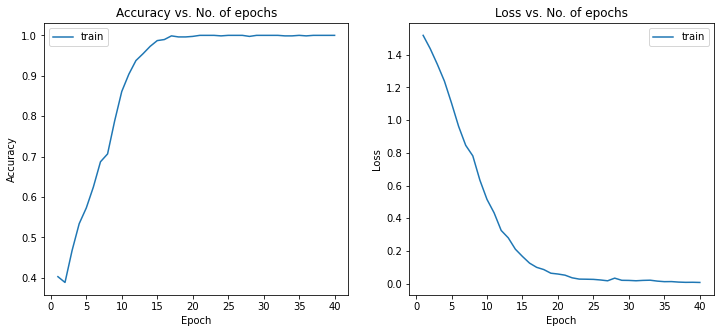

In [36]:
def plot_history(history):    
    
    acc = history.history['accuracy']
#     val_acc = history.history['val_accuracy']
    loss = history.history['loss']
#     val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc)
#     plt.plot(x, val_acc)
    plt.title('Accuracy vs. No. of epochs')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['train', 'valid'], loc='upper left')

    plt.subplot(1, 2, 2)
    plt.plot(x, loss)
#     plt.plot(x, val_loss)
    plt.title('Loss vs. No. of epochs')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['train', 'valid'], loc='upper right')
    plt.show()
plot_history(history)

In [37]:
result = model.evaluate(xtest, ytest, verbose= 2)

3/3 - 2s - loss: 1.3833 - accuracy: 0.6744


In [1]:
plot_history(result)

NameError: name 'plot_history' is not defined